[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-smallest-sets.ipynb)

In [10]:
%load_ext autoreload
%autoreload 2

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from core import get_online_quantile
import seaborn as sns
!pip install -U --no-cache-dir gdown --pre

[autoreload of typing_extensions failed: Traceback (most recent call last):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/typing_extensions.py", line 740, in <module>
    class SupportsAbs(Protocol[T_co]):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/typing.py", line 274, in inner
    return cached(*args,

[autoreload of pandas.core.nanops failed: Traceback (most recent call last):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 289, in update_function
    setattr(old, name, getattr(new, name))
ValueError: nanmean() requires a code object with 4 free vars, not 2
]
[autoreload of pandas.core.arrays.masked failed: Traceback (most recent call last):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in ch

[autoreload of pandas.core.arrays.sparse.array failed: Traceback (most recent call last):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 289, in up

[autoreload of pandas.core.internals.blocks failed: Traceback (most recent call last):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py", line 40, in <module>
    from pandas.core.dtypes.cast import (
ImportError: cannot import name 'soft_convert_objects' from 'pandas.core.dtypes.cast

[autoreload of pandas.core.series failed: Traceback (most recent call last):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/pandas/core/series.py", line 117, in <module>
    from pandas.core.construction import (
ImportError: cannot import name 'create_series_with_explicit_dtype' from 'pandas.core.construction' (/

[autoreload of pandas.io.html failed: Traceback (most recent call last):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/pandas/io/html.py", line 35, in <module>
    from pandas.core.construction import create_series_with_explicit_dtype
ImportError: cannot import name 'create_series_with_explicit_dtype' from 'panda

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of patsy failed: Traceback (most recent call last):
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/angelopoulos/miniconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/angelopoulos/miniconda3/lib/python3.9/site-packages/patsy/__init__.py", line 79, in <module>
    _reexport(patsy.highlevel)
AttributeError: module 'patsy' has no attribute 'highlevel'
]


In [39]:
# Load cached data
if not os.path.exists('../data'):
    os.system('gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz')
    os.system('tar -xf ../data.tar.gz -C ../')
    os.system('rm ../data.tar.gz')
if not os.path.exists('../data/imagenet/human_readable_labels.json'):
    !wget -nv -O ../data/imagenet/human_readable_labels.json -L https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json

data = np.load('../data/imagenet/imagenet-resnet152.npz')
example_paths = os.listdir('../data/imagenet/examples')

smx = data['smx']
labels = data['labels'].astype(int)
scores = 1-smx[np.arange(smx.shape[0]),labels]
idx = np.random.permutation(scores.shape[0])
scores = scores[idx]

# Problem setup
alpha = 0.1 # 1-alpha is the desired coverage
T = int(scores.shape[0]*0.9) # How long to run for
N_val = scores.shape[0] - T
scores_val = scores[-N_val:]
scores = scores[:-N_val]
etas_fixed = np.ones(T)*0.05
epsilon = 0.1
etas_decaying = np.array([1/(t**(1/2+epsilon)) for t in range(1, T+1)])
q_1 = scores[0]
q_star = np.quantile(scores, 1-alpha)

In [40]:
# Get the quantiles
q_fixed = get_online_quantile(scores, q_1, etas_fixed, alpha)
q_decaying = get_online_quantile(scores, q_1, etas_decaying, alpha)

# Check coverage
observed_coverages_fixed = (scores <= q_fixed).astype(int)
observed_coverages_decaying = (scores <= q_decaying).astype(int)
observed_coverages_oracle = (scores <= q_star).astype(int)

def smooth_array(arr, window_size):
    # Create a window of ones of length window_size
    window = np.ones(window_size) / window_size
    
    # Use convolve to apply the window to the array
    # 'valid' mode returns output only where the window fits completely
    smoothed = np.convolve(arr, window, mode='same')
    
    return smoothed

# Smoothed coverage
W = 1000
observed_coverage_fixed = smooth_array(observed_coverages_fixed, W)
observed_coverage_decaying = smooth_array(observed_coverages_decaying, W)
observed_coverage_oracle = smooth_array(observed_coverages_oracle, W)

# Time-conditional coverage
time_coverage_fixed = (scores_val[:,None] <= q_fixed[None,:]).mean(axis=0)
time_coverage_decaying = (scores_val[:,None] <= q_decaying[None,:]).mean(axis=0)

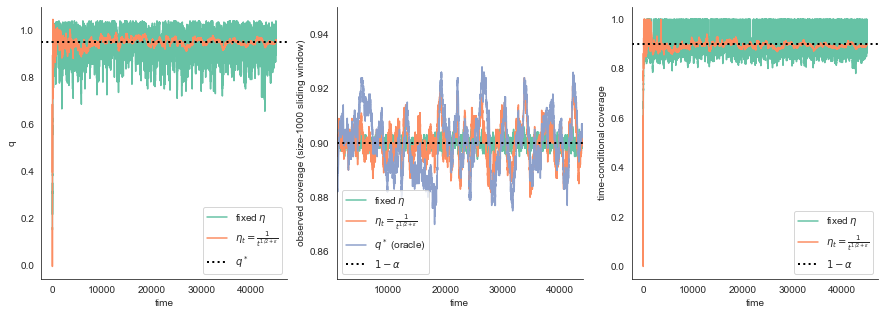

In [41]:
# Plot quantile and coverage
sns.set_style("white")
sns.set_palette('Set2')
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].plot(range(T), q_fixed, label=r'fixed $\eta$')
axs[0].plot(range(T), q_decaying, label=r'$\eta_t = \frac{1}{t^{1/2+\epsilon}}$')
axs[0].axhline(y=q_star, linestyle='dotted', color="k", linewidth=2, label=r'$q^*$')
axs[0].set_ylabel('q')
axs[0].set_xlabel('time')
axs[0].legend()
axs[1].plot(range(T), observed_coverage_fixed, label=r'fixed $\eta$')
axs[1].plot(range(T), observed_coverage_decaying, label=r'$\eta_t = \frac{1}{t^{1/2+\epsilon}}$')
axs[1].plot(range(T), observed_coverage_oracle, label=r'$q^*$ (oracle)')
axs[1].axhline(y=1-alpha, linestyle='dotted', color="k", linewidth=2, label=r'$1-\alpha$')
axs[1].set_xlabel('time')
axs[1].set_ylabel(f"observed coverage (size-{W} sliding window)")
axs[1].set_xlim([W, T-W])
axs[1].set_ylim([0.85, 0.95])
axs[1].legend()
axs[2].plot(range(T), time_coverage_fixed, label=r'fixed $\eta$')
axs[2].plot(range(T), time_coverage_decaying, label=r'$\eta_t = \frac{1}{t^{1/2+\epsilon}}$')
axs[2].axhline(y=1-alpha, linestyle='dotted', color="k", linewidth=2, label=r'$1-\alpha$')
axs[2].set_xlabel('time')
axs[2].set_ylabel(f"time-conditional coverage")
axs[2].legend()
sns.despine(top=True, right=True)
os.makedirs('./results/', exist_ok=True)
plt.savefig('./results/imagenet-shuffled.pdf')